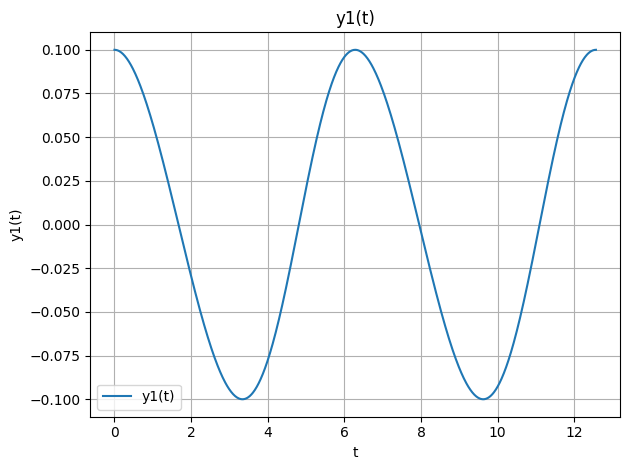

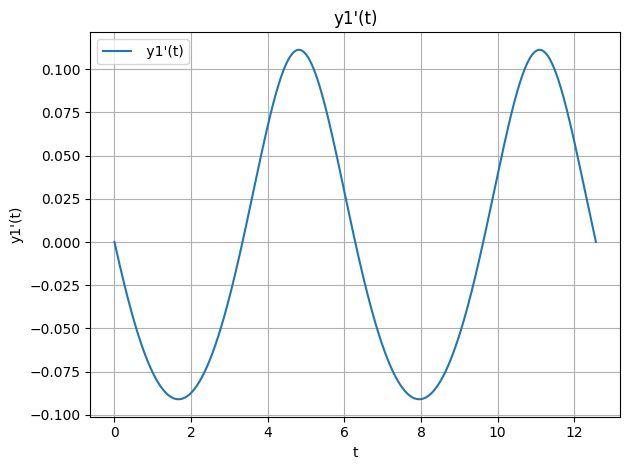

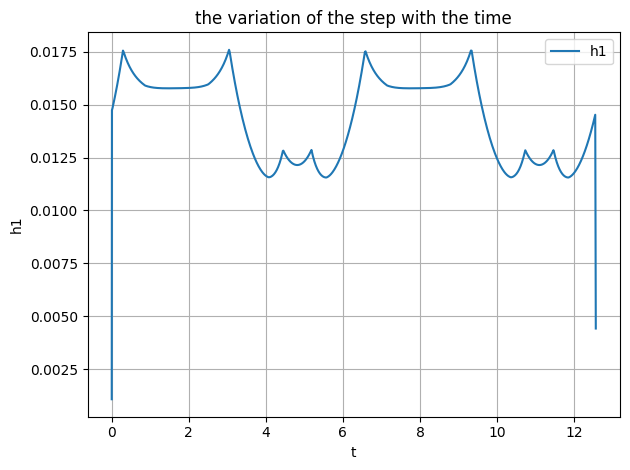

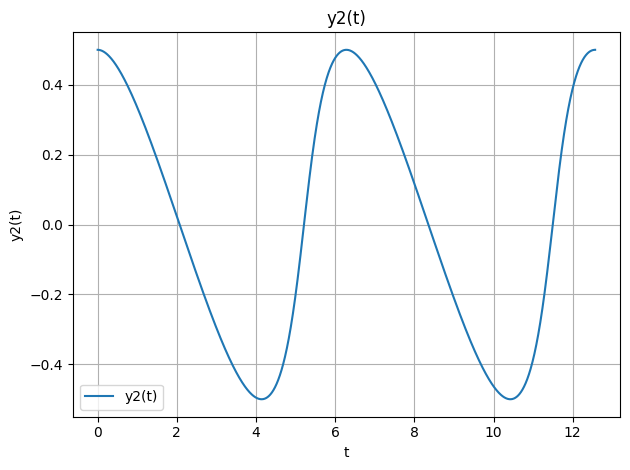

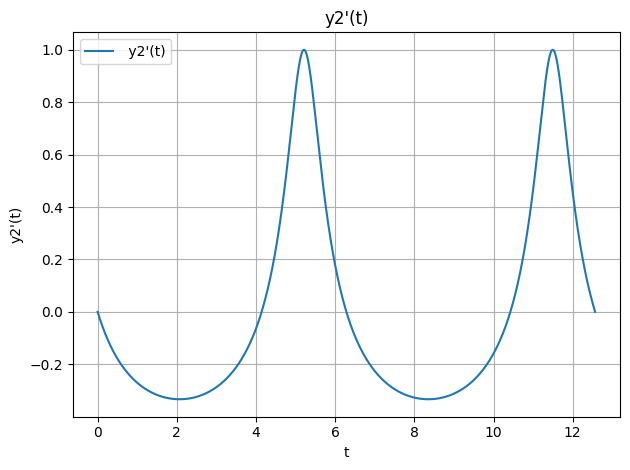

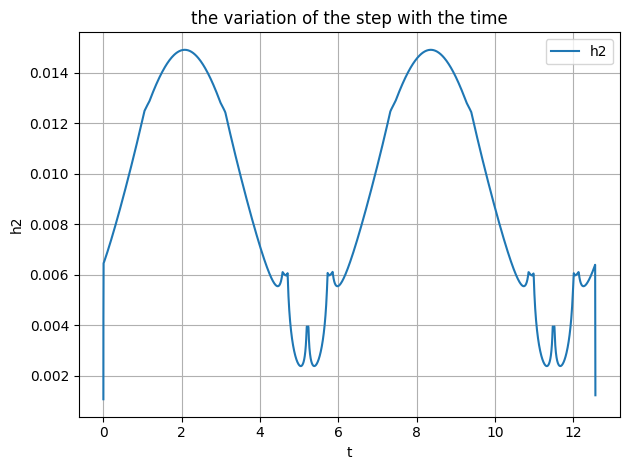

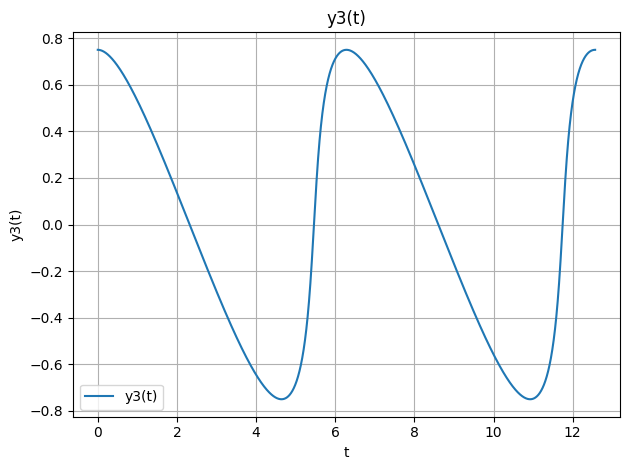

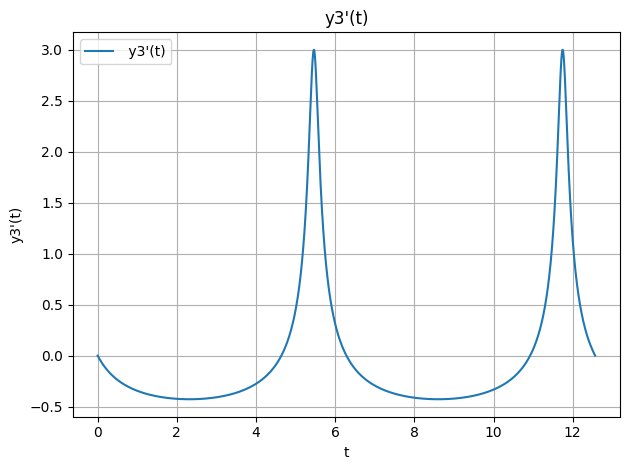

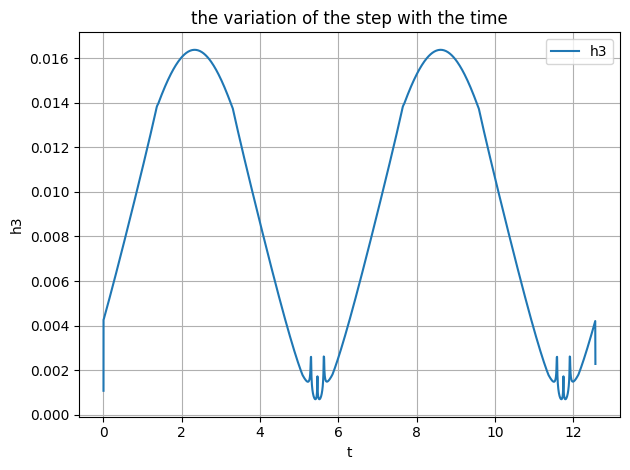

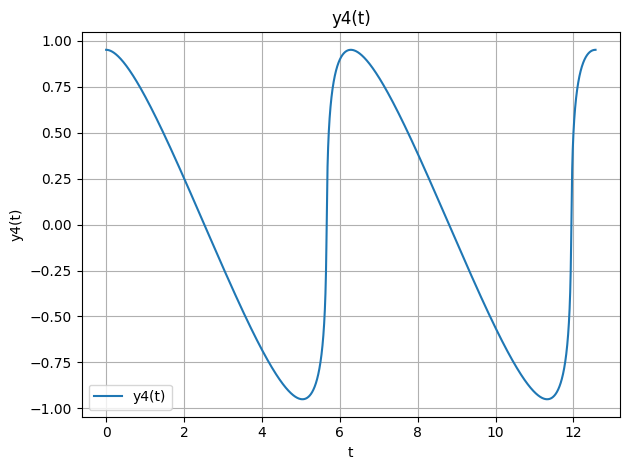

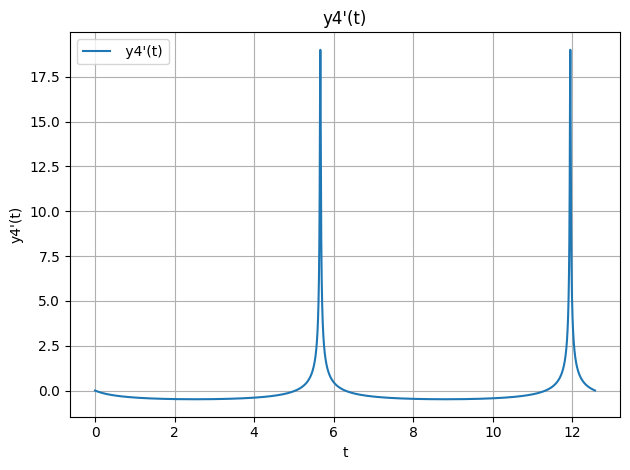

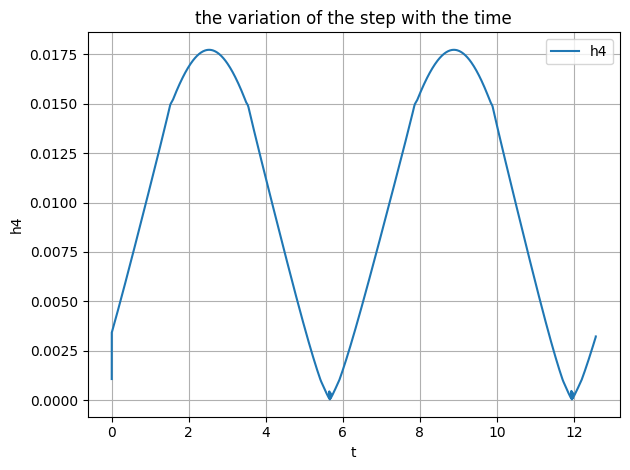

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rk23(ivp, tol):
   
    #初始值
    a, b = ivp.tspan
    t = [a]
    u = [np.asarray(ivp.u0, dtype=float)]
    i = 0
    h = 0.5 * tol ** (1/3)
    s1 = ivp.f(ivp.u0, a)
    h_values = []
    
    #时间迭代
    while t[i] < b:
        h_values.append(h)
        #检测时间是否过小
        if t[i] + h == t[i]:
            print(f"Warning: Stepsize too small near t={t[i]}")
            break  
        
        # 计算RK各阶段的斜率
        s2 = ivp.f(u[i] + (h/2) * s1, t[i] + h/2)
        s3 = ivp.f(u[i] + (3*h/4) * s2, t[i] + 3*h/4)
        unew2 = u[i] + h * (2*s1 + 3*s2 + 4*s3) / 9  #二阶精度解
        s4 = ivp.f(unew2, t[i] + h)
        err = h * (-5*s1/72 + s2/12 + s3/9 - s4/8)  # 截断误差
        E = np.linalg.norm(err, np.inf)              # 误差范数
        maxerr = tol * (1 + np.linalg.norm(u[i], np.inf))  # r计算允许的最大误差
        
        # 判断当前步是否符合
        if E < maxerr:  # yes
            t.append(t[i] + h)
            u.append(unew2)
            i += 1
            s1 = s4  
        
        # 自适应调整步长
        q = 0.8 * (maxerr/E) ** (1/3)  # 保守的最优步长因子
        q = min(q, 4)                  # 限制步长增长过快
        h = min(q * h, b - t[i])       #  确保不超过右端点
    
    return np.array(t), np.array(u),np.array(h_values)

class  Ivp:
    def __init__(self,tspan,u0,f):
        self.tspan = tspan
        self.u0 = u0
        self.f = f
    def funtion(self,tol=10**-8 ):
        return rk23(self,tol)
def f(u,t):
    y1,y2 = u
    return np.array([y2,-y1 * (1 + y2)**3])


def plot(t,u,h,n):
    #绘图
    #y(t)
    plt.plot(t,u[:,0],label = f'y{n}(t)')
    plt.xlabel('t')
    plt.ylabel(f'y{n}(t)')
    plt.title(f'y{n}(t)')
    plt.tight_layout()
    plt.grid(True)
    plt.legend()
    plt.show()

    #y'(t)
    plt.plot(t,u[:,1],label =f" y{n}'(t)")
    plt.xlabel('t')
    plt.ylabel(f"y{n}'(t)")
    plt.title(f"y{n}'(t)")
    plt.tight_layout()
    plt.grid(True)
    plt.legend()
    plt.show()

    #h
    min_len = min(len(t), len(h))
    plt.plot(t[:min_len], h[:min_len], label = f'h{n}')  
    plt.xlabel('t')
    plt.ylabel(f'h{n}')
    plt.title('the variation of the step with the time')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
#函数调用
ivp1 = Ivp(tspan = (0,4*np.pi),u0 = np.array([0.1,0]),f=f )
t1,u1,h1 = ivp1.funtion()

ivp2 = Ivp(tspan = (0,4*np.pi),u0 = np.array([0.5,0]),f=f )
t2,u2,h2 = ivp2.funtion()

ivp3 = Ivp(tspan = (0,4*np.pi),u0 = np.array([0.75,0]),f=f )
t3,u3,h3 = ivp3.funtion()

ivp4 = Ivp(tspan = (0,4*np.pi),u0 = np.array([0.95,0]),f=f )
t4,u4,h4 = ivp4.funtion()

#绘图函数的调用
plot(t1,u1,h1,1)
plot(t2,u2,h2,2)
plot(t3,u3,h3,3)
plot(t4,u4,h4,4)

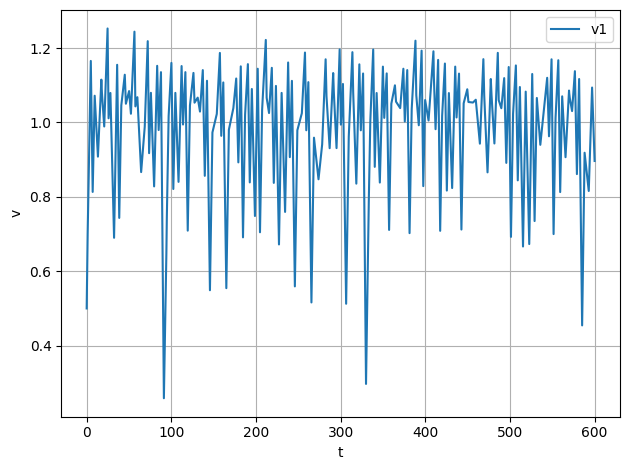

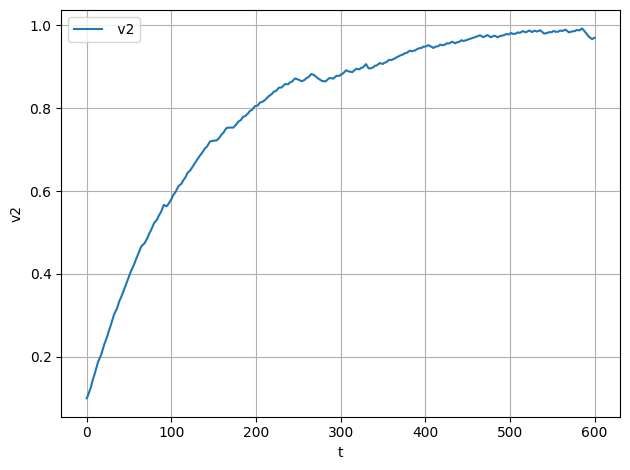

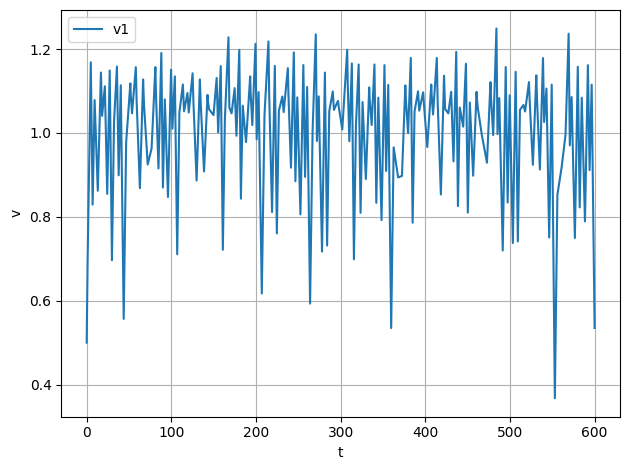

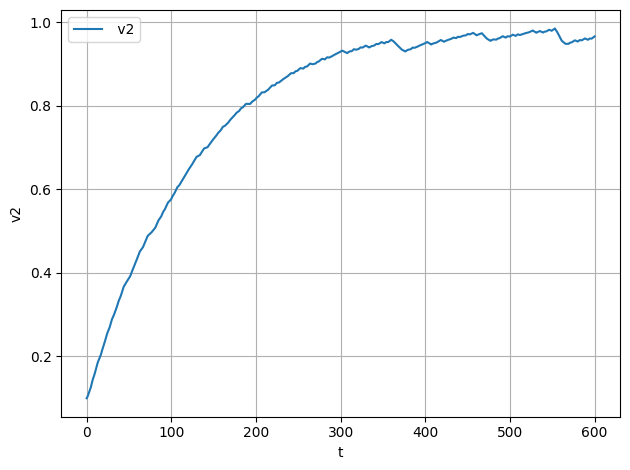

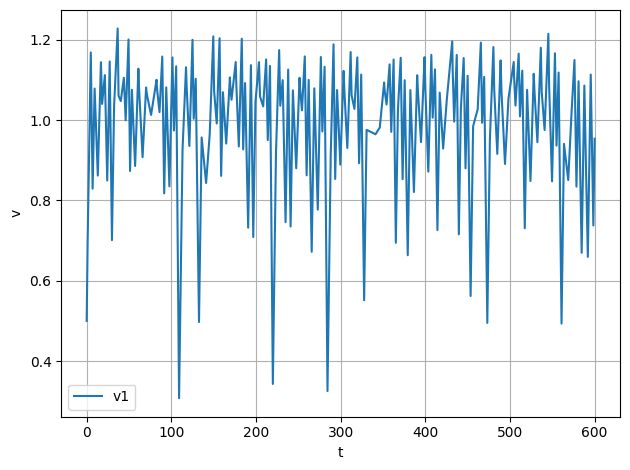

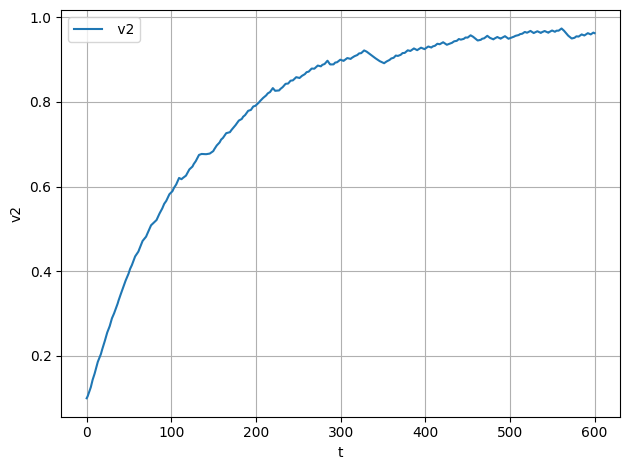

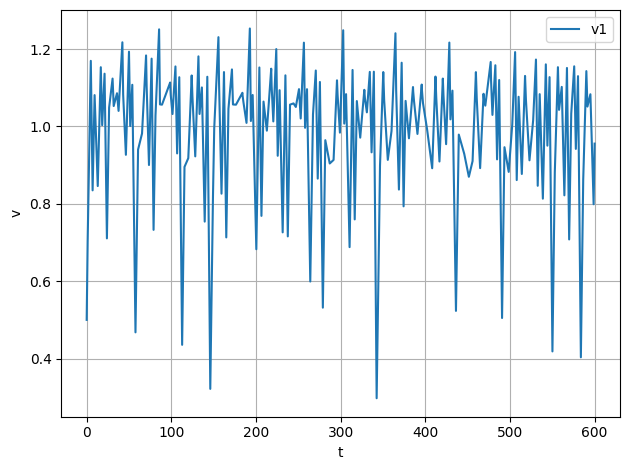

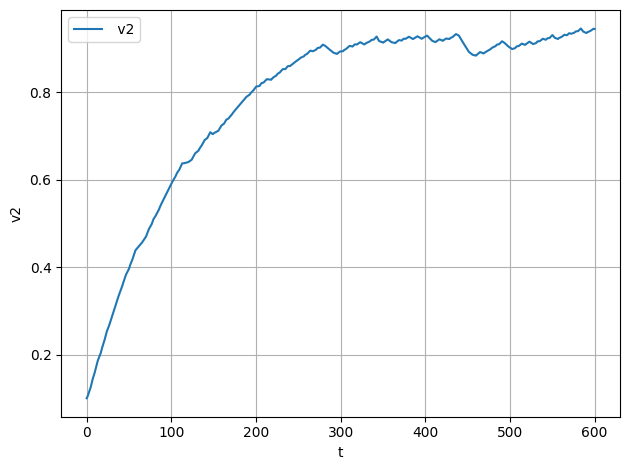

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def rk23(ivp, tol):
   
    #初始值
    a, b = ivp.tspan
    t = [a]
    u = [np.asarray(ivp.u0, dtype=float)]
    i = 0
    h = 0.5 * tol ** (1/3)
    I_0 = ivp.k
    s1 = ivp.f(ivp.u0, a,I_0)
    h_values = []
    I_0 = ivp.k
    #时间迭代
    while t[i] < b:
        h_values.append(h)
        #检测时间是否过小
        if t[i] + h == t[i]:
            print(f"Warning: Stepsize too small near t={t[i]}")
            break  
        
        # 计算RK各阶段的斜率
        s2 = ivp.f(u[i] + (h/2) * s1, t[i] + h/2,I_0)
        s3 = ivp.f(u[i] + (3*h/4) * s2, t[i] + 3*h/4,I_0)
        unew2 = u[i] + h * (2*s1 + 3*s2 + 4*s3) / 9  #二阶精度解
        s4 = ivp.f(unew2, t[i] + h,I_0)
        err = h * (-5*s1/72 + s2/12 + s3/9 - s4/8)  # 截断误差
        E = np.linalg.norm(err, np.inf)              # 误差范数
        maxerr = tol * (1 + np.linalg.norm(u[i], np.inf))  # r计算允许的最大误差
        
        # 判断当前步是否符合
        if E < maxerr:  # yes
            t.append(t[i] + h)
            u.append(unew2)
            i += 1
            s1 = s4  
        
        # 自适应调整步长
        q = 0.8 * (maxerr/E) ** (1/3)  # 保守的最优步长因子
        q = min(q, 4)                  # 限制步长增长过快
        h = min(q * h, b - t[i])       #  确保不超过右端点
    
    return np.array(t), np.array(u),np.array(h_values)

class  Ivp:
    def __init__(self,tspan,u0,f,k):
        self.tspan = tspan
        self.u0 = u0
        self.k = k
        self.f = f
    def funtion(self,tol=10**-8 ):
        return rk23(self,tol)
#参数
a1 = 0.1
theta = 0.008
gama = 1
I = [0.05527,0.05683,0.0568385,0.05740]
def f(u,t,i):
    v1,v2 = u
    return np.array([-v1*(v1 - 1)*(v1 - a1)+i,theta*(v1 - gama * v2)])


def plot(t,u):
    #绘图
    #y(t)
    plt.plot(t,u[:,0],label = f'v1')
    plt.xlabel('t')
    plt.ylabel(f'v')
    plt.tight_layout()
    plt.grid(True)
    plt.legend()
    plt.show()

    #y'(t)
    plt.plot(t,u[:,1],label =f" v2")
    plt.xlabel('t')
    plt.ylabel(f"v2")
    plt.tight_layout()
    plt.grid(True)
    plt.legend()
    plt.show()

#函数调用
ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[0])
t,u,h = ivp.funtion(10e-2)
plot(t,u)

ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[1])
t,u,h = ivp.funtion(10e-2)
plot(t,u)

ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[2])
t,u,h = ivp.funtion(10e-2)
plot(t,u)

ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[3])
t,u,h = ivp.funtion(10e-2)
plot(t,u)


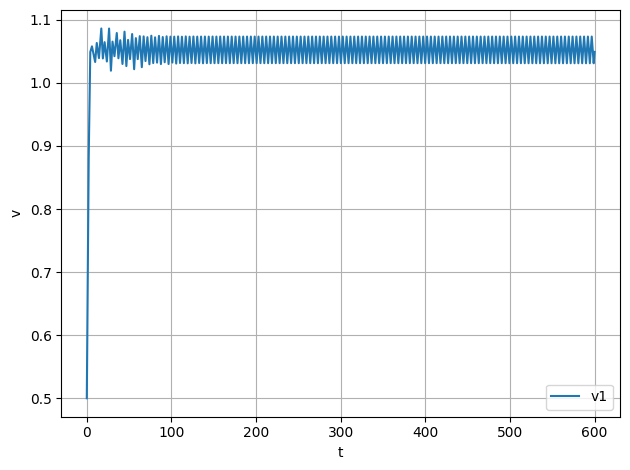

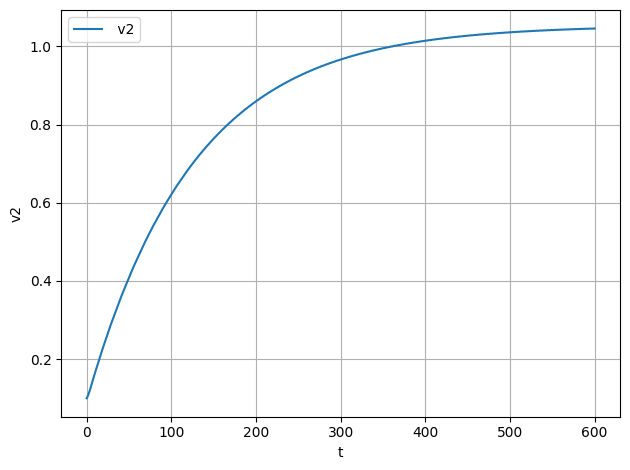

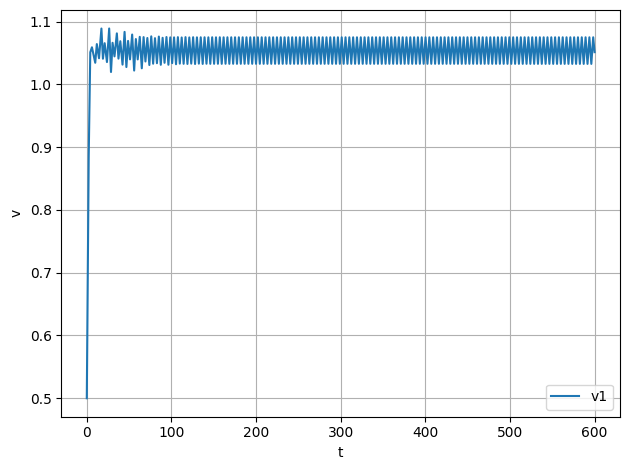

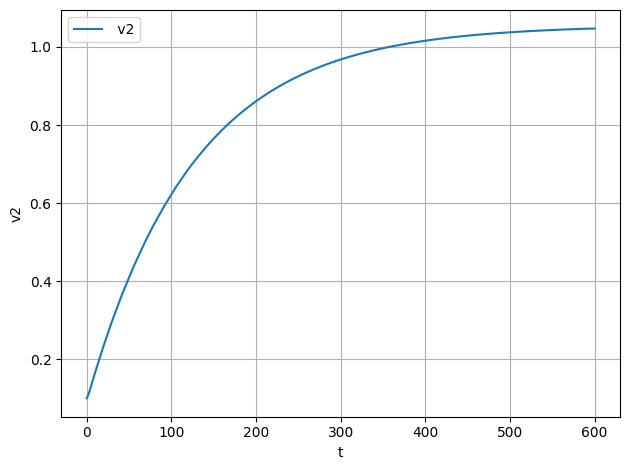

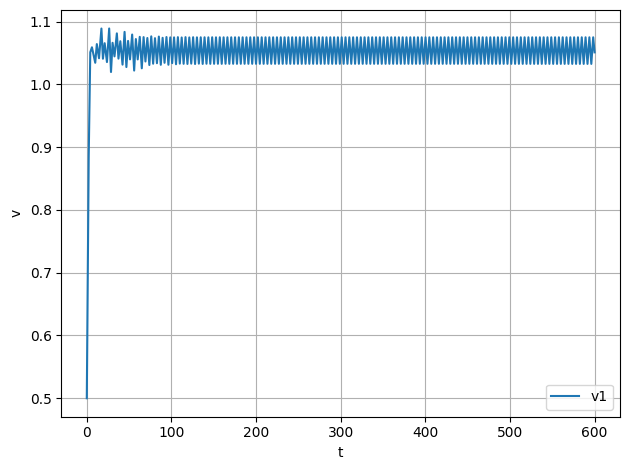

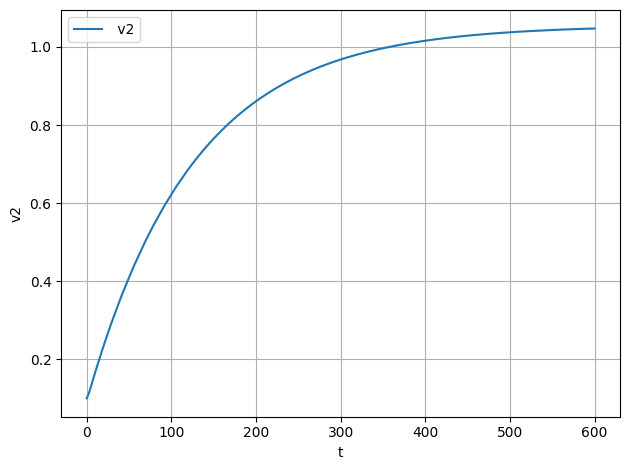

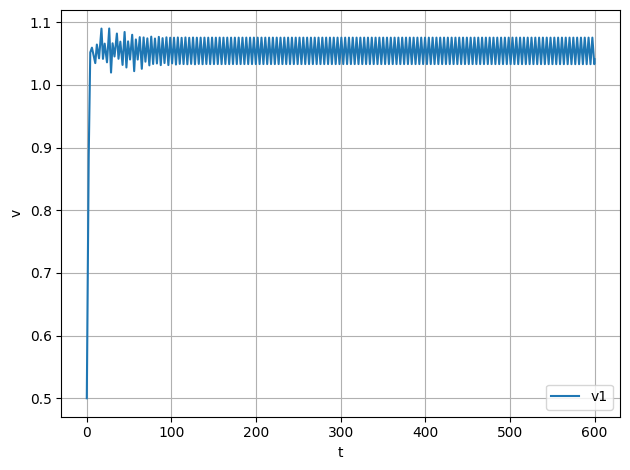

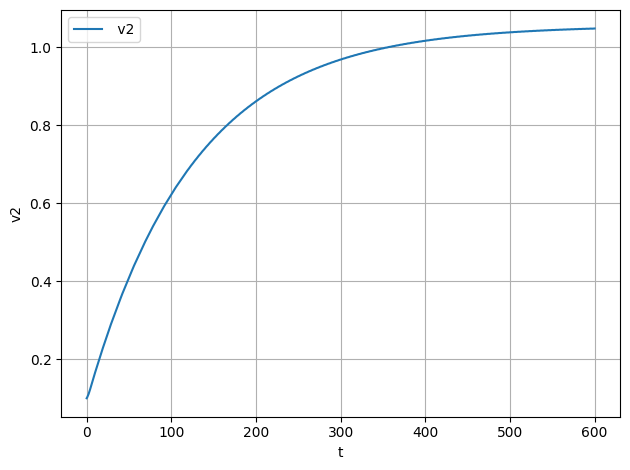

In [3]:
ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[0])
t,u,h = ivp.funtion(10e-3)
plot(t,u)

ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[1])
t,u,h = ivp.funtion(10e-3)
plot(t,u)

ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[2])
t,u,h = ivp.funtion(10e-3)
plot(t,u)

ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[3])
t,u,h = ivp.funtion(10e-3)
plot(t,u)

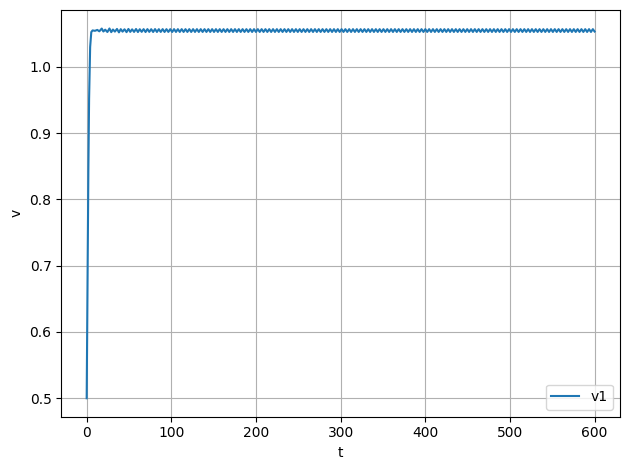

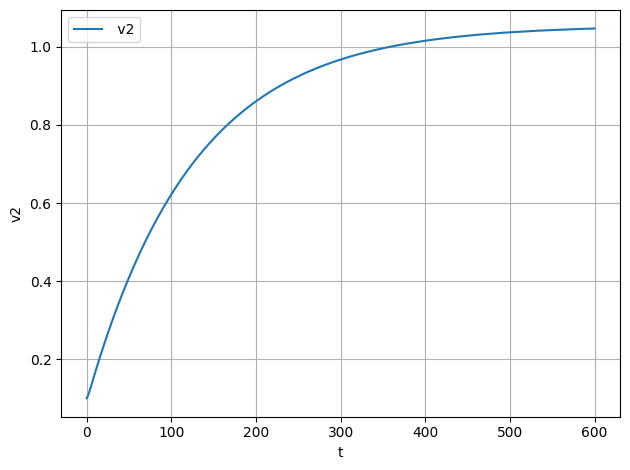

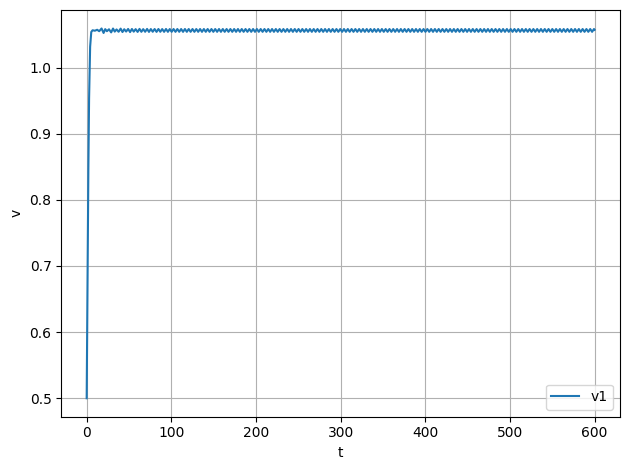

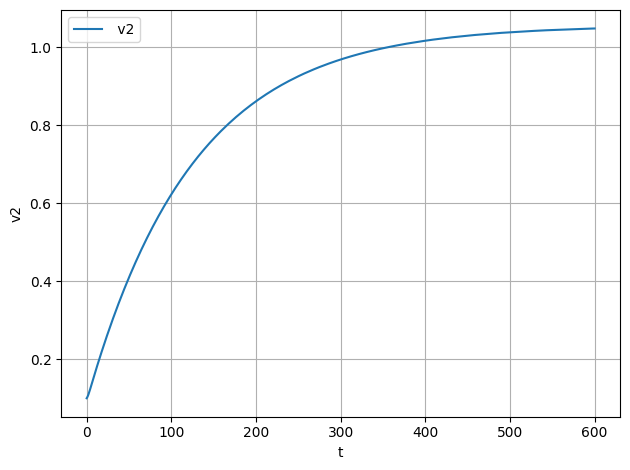

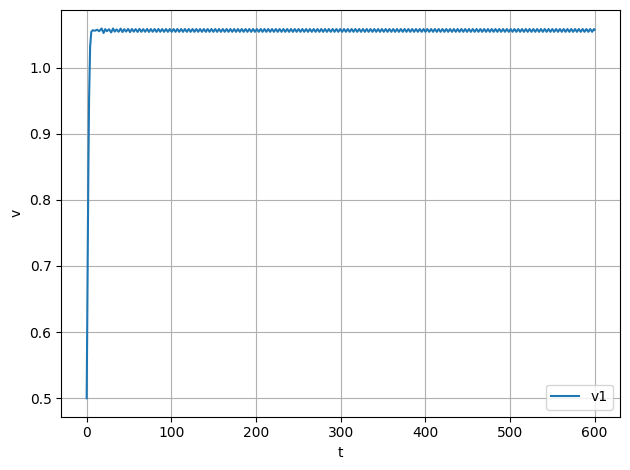

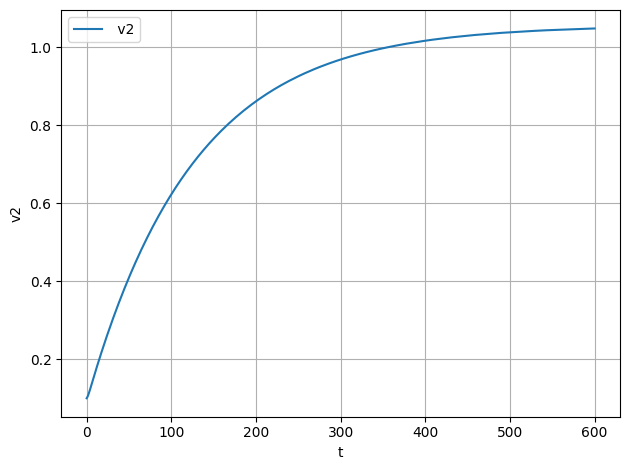

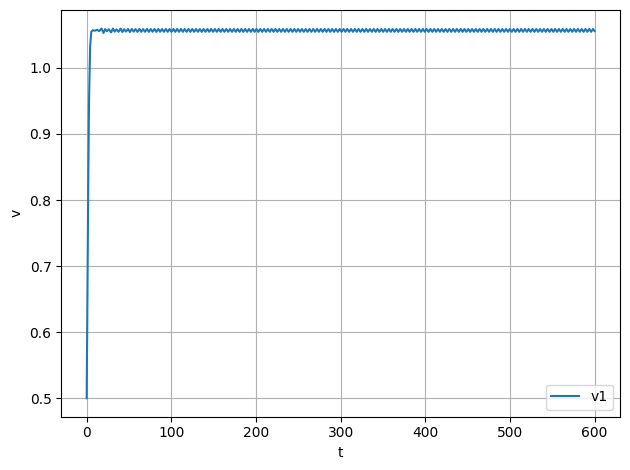

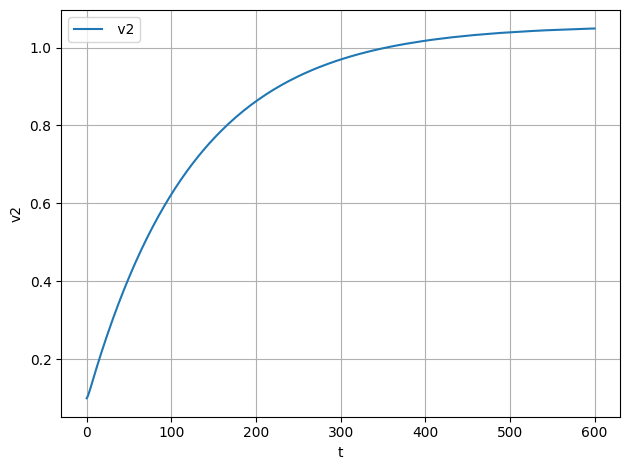

In [4]:
ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[0])
t,u,h = ivp.funtion(10e-4)
plot(t,u)

ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[1])
t,u,h = ivp.funtion(10e-4)
plot(t,u)

ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[2])
t,u,h = ivp.funtion(10e-4)
plot(t,u)

ivp = Ivp((0,600),np.array([0.5,0.1]),f = f,k=I[3])
t,u,h = ivp.funtion(10e-4)
plot(t,u)

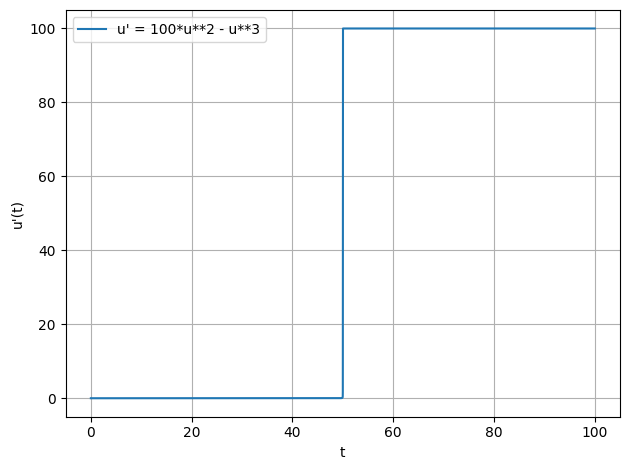

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def rk23(ivp, tol):
   
    #初始值
    a, b = ivp.tspan
    t = [a]
    u = [np.asarray(ivp.u0, dtype=float)]
    i = 0
    h = 0.5 * tol ** (1/3)
    s1 = ivp.f(ivp.u0, a)
    h_values = []
    
    #时间迭代
    while t[i] < b:
        h_values.append(h)
        #检测时间是否过小
        if t[i] + h == t[i]:
            print(f"Warning: Stepsize too small near t={t[i]}")
            break  
        
        # 计算RK各阶段的斜率
        s2 = ivp.f(u[i] + (h/2) * s1, t[i] + h/2)
        s3 = ivp.f(u[i] + (3*h/4) * s2, t[i] + 3*h/4)
        unew2 = u[i] + h * (2*s1 + 3*s2 + 4*s3) / 9  #二阶精度解
        s4 = ivp.f(unew2, t[i] + h)
        err = h * (-5*s1/72 + s2/12 + s3/9 - s4/8)  # 截断误差
        E = np.linalg.norm(err, np.inf)              # 误差范数
        maxerr = tol * (1 + np.linalg.norm(u[i], np.inf))  # r计算允许的最大误差
        
        # 判断当前步是否符合
        if E < maxerr:  # yes
            t.append(t[i] + h)
            u.append(unew2)
            i += 1
            s1 = s4  
        
        # 自适应调整步长
        q = 0.8 * (maxerr/E) ** (1/3)  # 保守的最优步长因子
        q = min(q, 4)                  # 限制步长增长过快
        h = min(q * h, b - t[i])       #  确保不超过右端点
    
    return np.array(t), np.array(u),np.array(h_values)

class  Ivp:
    def __init__(self,tspan,u0,f):
        self.tspan = tspan
        self.u0 = u0
        self.f = f
    def funtion(self,tol=10**-8 ):
        return rk23(self,tol)
def f(u,t):
    return 100 * u**2 - u**3

ivp = Ivp((0,100),np.array([0.0002]),f=f)
t,u,h = ivp.funtion()

plt.plot(t,u,label = "u' = 100*u**2 - u**3")
plt.xlabel('t')
plt.ylabel("u'(t)")
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()

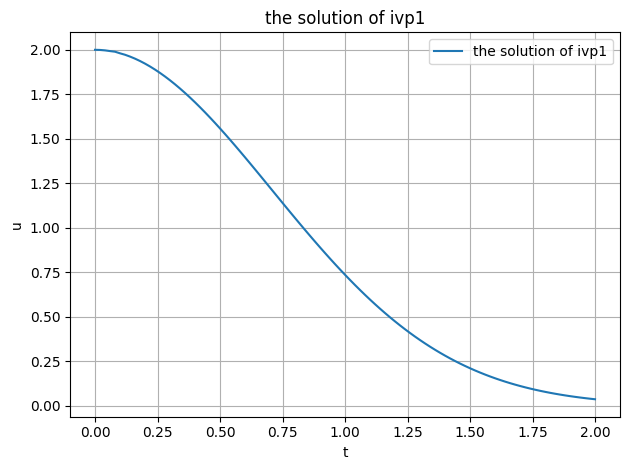

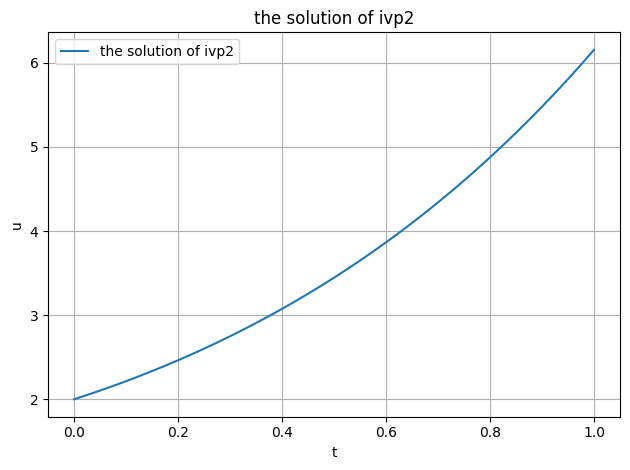

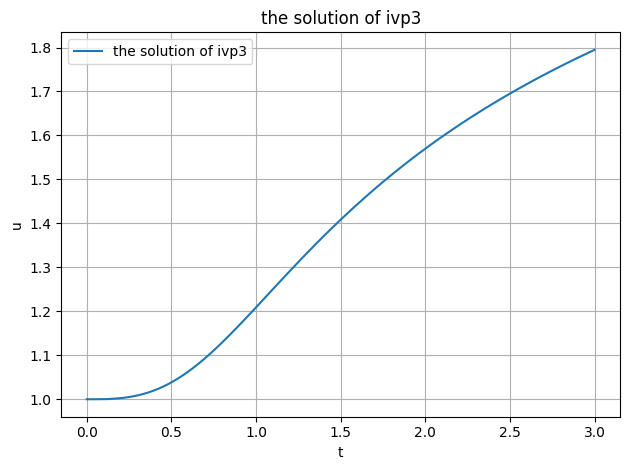

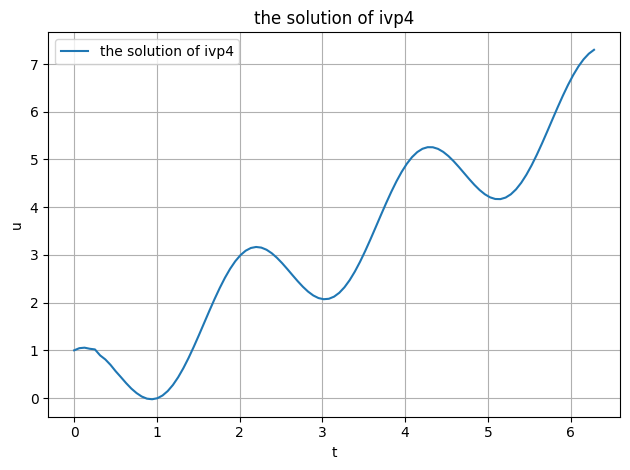

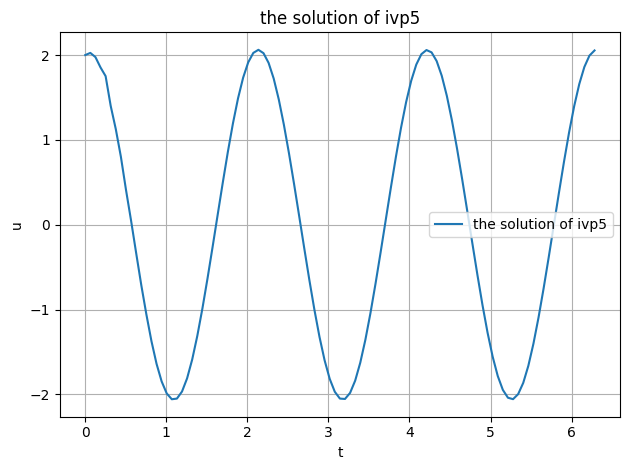

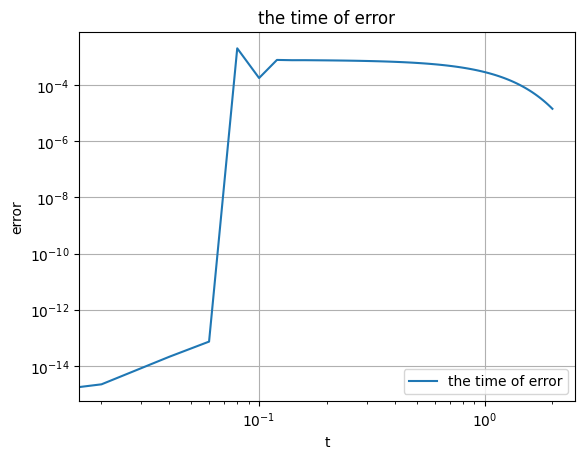

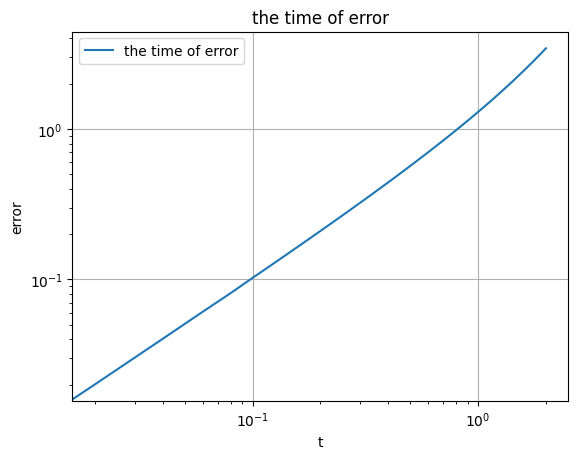

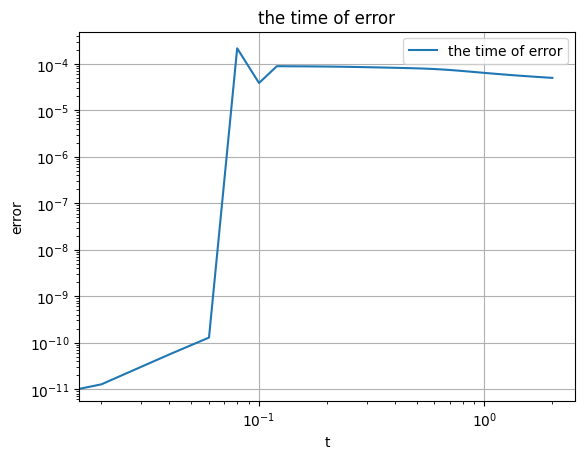

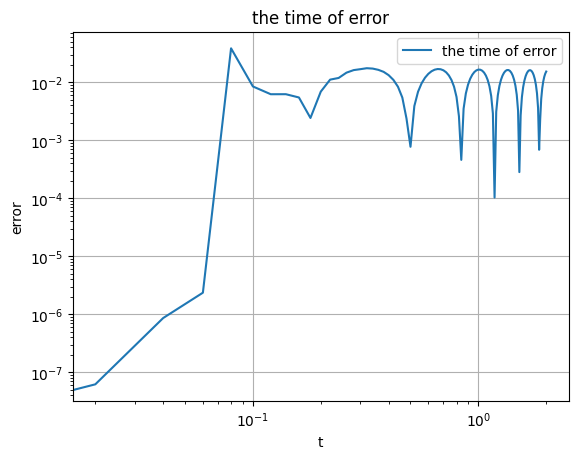

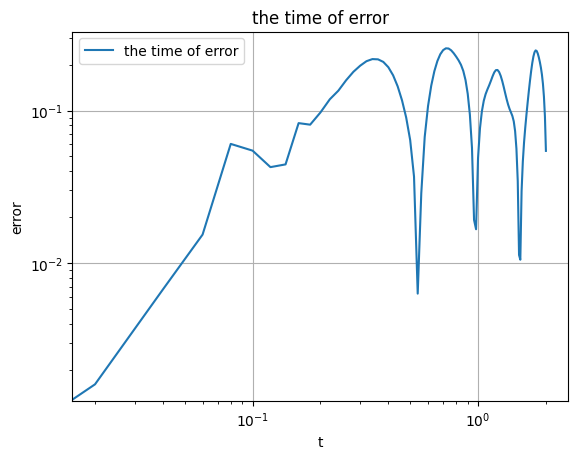

In [6]:
import numpy as np
import matplotlib.pyplot as plt
def ab4(ivp, n):
 
    # 时间离散化
    a, b = ivp['tspan']
    h = (b - a) / n
    t = np.array([a + i * h for i in range(n + 1)])
    
    # AB4方法的系数
    k = 4
    thegema = np.array([55, -59, 37, -9]) / 24
    
    # 使用RK4方法生成初始值
    # 正确初始化u数组，支持标量和向量
    u0 = ivp['u0']
    if isinstance(u0, (int, float)):
        u = np.zeros(n + 1)
        u[0] = u0
    else:
        # 处理向量情况
        u0 = np.asarray(u0)
        u = np.zeros((n + 1, u0.size))
        u[0] = u0
    
    # RK4单步计算函数
    def rk4_step(u, t, h, f):
        k1 = h * f(u, t)
        k2 = h * f(u + k1/2, t + h/2)
        k3 = h * f(u + k2/2, t + h/2)
        k4 = h * f(u + k3, t + h)
        return u + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    # 使用RK4方法生成前k个值
    for i in range(k - 1):
        u[i + 1] = rk4_step(u[i], t[i], h, ivp['f'])
    
    # 计算导数值，从最新到最旧排列
    f_history = [ivp['f'](u[k - i - 1], t[k - i - 1]) for i in range(k - 1)]
    
    # 主时间循环
    for i in range(k - 1, n):
        # 计算新的导数值并更新历史
        f_new = ivp['f'](u[i], t[i])
        f_history = [f_new] + f_history[:k - 1]
        
        # 使用AB4公式推进一个时间步
        u[i + 1] = u[i] + h * sum(f_history[j] * thegema[j] for j in range(k))
    
    return t, u
def f1(u,t):
    return -2 * t * u

def f2(u,t):
    return u + t

def f3(u,t):
    return t**2/u/(1 + t**3)

def f4(u,t):
    y1,y2 = u
    return np.array([y2,9*t - 9*y1])

def f5(u,t):
    y1,y2 = u
    return np.array([y2,np.sin(2*y1) - 9*y1])

#精确解
def exact_1(t):
    return 2 * np.exp(-t**2)

def exact_2(t):
    return 1 - t + np.exp(t)

def exact_3(t):
    return np.sqrt(1 + (2/3) * np.log(1 + t**3))

def exact_4(t):
    return t + np.cos(3*t)

def exact_5(t):
    return 1/5 * np.sin(3*t) + 2*np.cos(3*t) + 1/5*np.sin(2*t)

#误差函数
def error(exact,predict):
    return abs(exact - predict)

#解的图函数
def plot_solution(t,u,ivp):
    plt.plot(t,u,label = f'the solution of {ivp}')
    plt.xlabel('t')
    plt.ylabel('u')
    plt.title(f'the solution of {ivp}')
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

#误差函数图
def plot_error(t,error):
    plt.loglog(t,error,label = 'the time of error')
    plt.xlabel('t')
    plt.ylabel('error')
    plt.title('the time of error')
    plt.grid(True)
    plt.legend()
    plt.show()

ivp1 = {'tspan' : (0,2),'u0' : 2,'f' : f1}
ivp2 = {'tspan' : (0,1),'u0' : 2,'f' : f2}
ivp3 = {'tspan' : (0,3),'u0' : 1,'f' : f3}
ivp4 = {'tspan' : (0,2*np.pi),'u0' : np.array([1,1]),'f' : f4}
ivp5 = {'tspan' : (0,2*np.pi),'u0' : np.array([2,1]),'f' : f5}

#求解
t1,u1 = ab4(ivp1,100)
t2,u2 = ab4(ivp2,100)
t3,u3 = ab4(ivp3,100)
t4,u4 = ab4(ivp4,100)
t5,u5 = ab4(ivp5,100)

error_1 = error(exact_1(t1),u1)
error_2 = error(exact_2(t2),u2)
error_3 = error(exact_3(t3),u3)
error_4 = error(exact_4(t4),u4[:,0])
error_5 = error(exact_5(t5),u5[:,0])

plot_solution(t1,u1,'ivp1')
plot_solution(t2,u2,'ivp2')
plot_solution(t3,u3,'ivp3')
plot_solution(t4,u4[:,0],'ivp4')
plot_solution(t5,u5[:,0],'ivp5')

plot_error(t1,error_1)
plot_error(t1,error_2)
plot_error(t1,error_3)
plot_error(t1,error_4)
plot_error(t1,error_5)


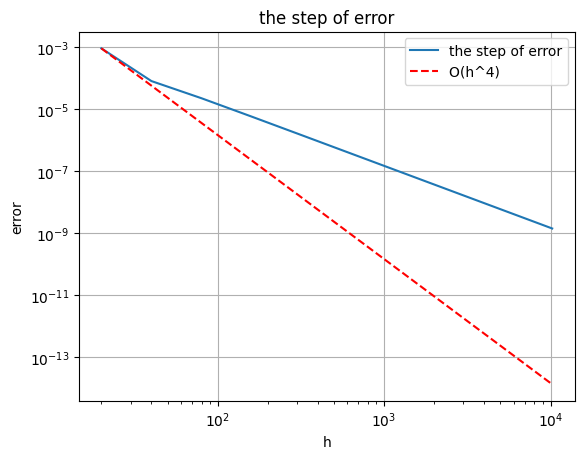

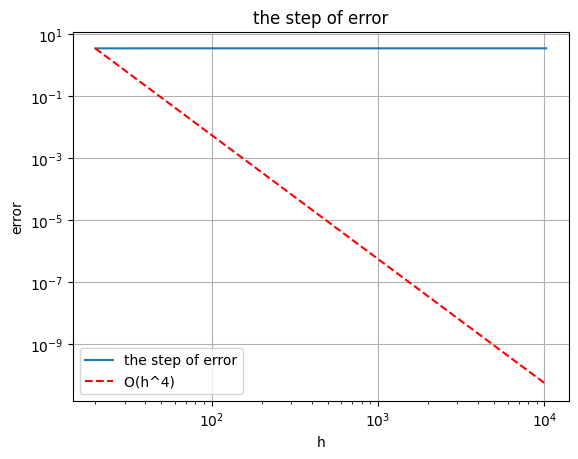

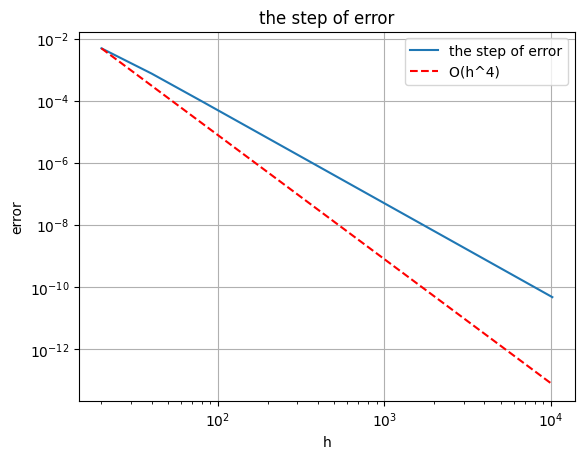

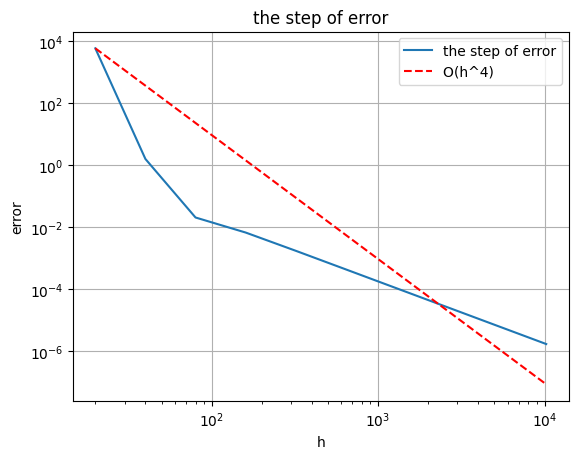

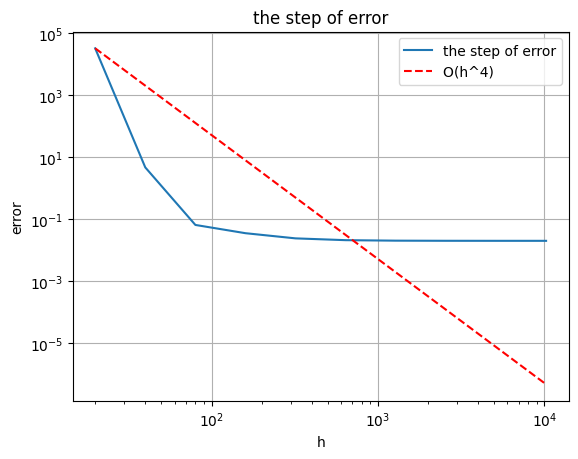

In [7]:
n = [10*2**i for i in range(1,11)]

#时间误差
def plot_time_error(t,error):
    plt.loglog(t,error,label = 'the step of error')
    ref_errors = [error[0] * (n[0]/i)**4 for i in n]
    plt.loglog(n, ref_errors, 'r--', label=f'O(h^{4}) ')
    plt.xlabel('h')
    plt.ylabel('error')
    plt.title('the step of error')
    plt.grid(True)
    plt.legend()
    plt.show()

errors_1 = []
errors_2 = []
errors_3 = []
errors_4 = []
errors_5 = []

t1 = []
t2 = []
t3 = []
t4 = []
t5 = []
#1
for i in n:
    t,u = ab4(ivp1,i)
    err= error(exact_1(t)[-1] , u[-1])
    errors_1.append(err)
plot_time_error(n,errors_1)

for i in n:
    t,u = ab4(ivp2,i)
    err= error(exact_2(t)[-1] , u[-1])
    errors_2.append(err)
plot_time_error(n,errors_2)

for i in n:
    t,u = ab4(ivp3,i)
    err= error(exact_3(t)[-1] , u[-1])
    errors_3.append(err)
plot_time_error(n,errors_3)

for i in n:
    t,u = ab4(ivp4,i)
    err= error(exact_4(t)[-1] , u[-1,0])
    errors_4.append(err)
plot_time_error(n,errors_4)

for i in n:
    t,u = ab4(ivp5,i)
    err= error(exact_5(t)[-1] , u[-1,0])
    errors_5.append(err)
plot_time_error(n,errors_5)

 
        

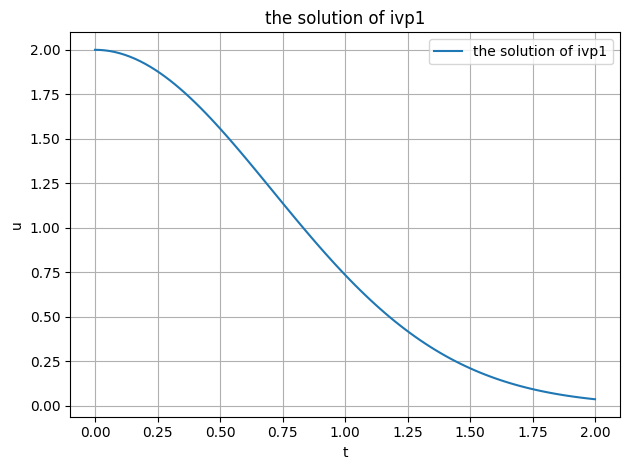

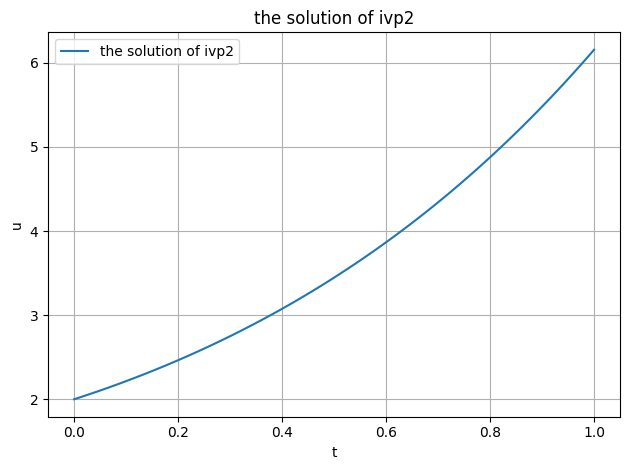

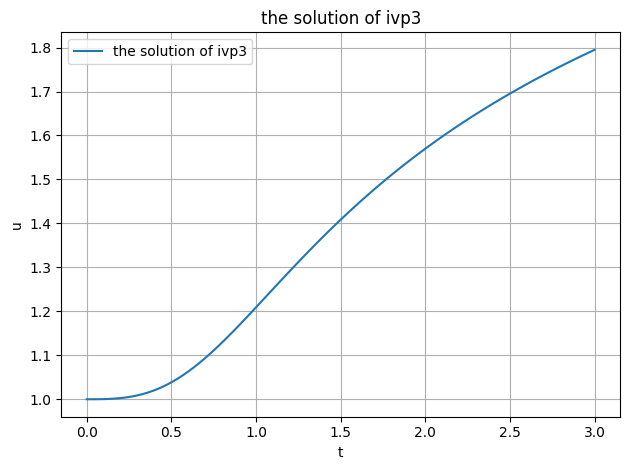

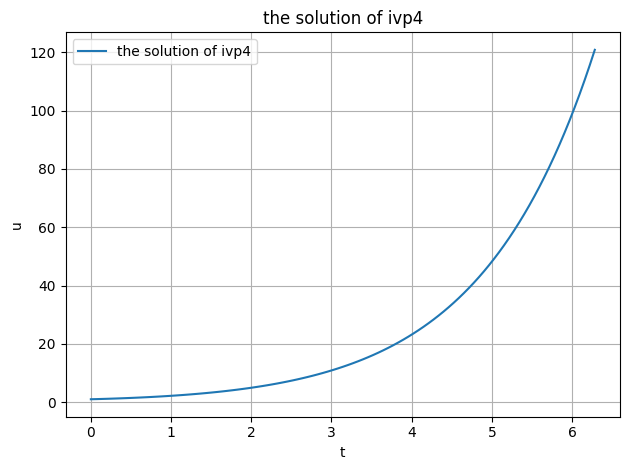

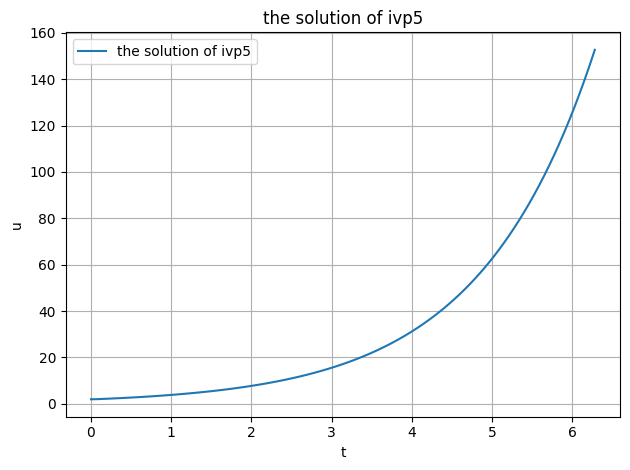

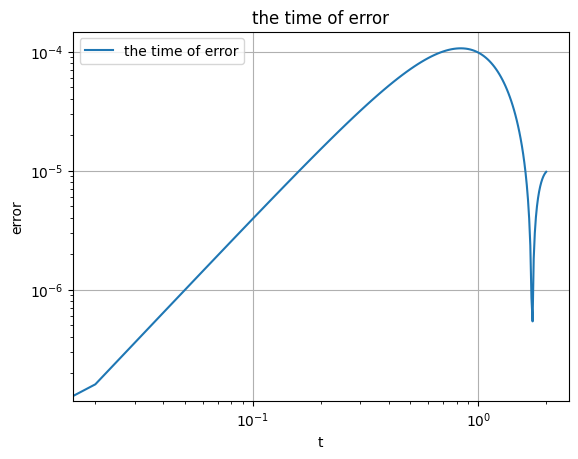

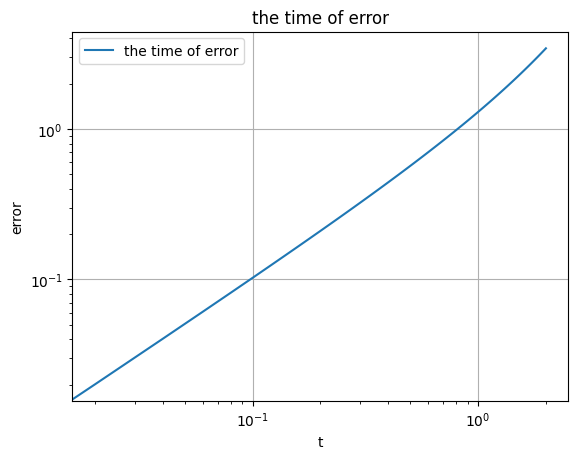

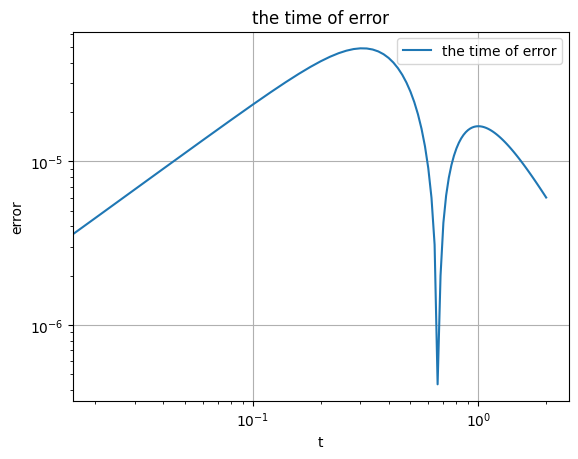

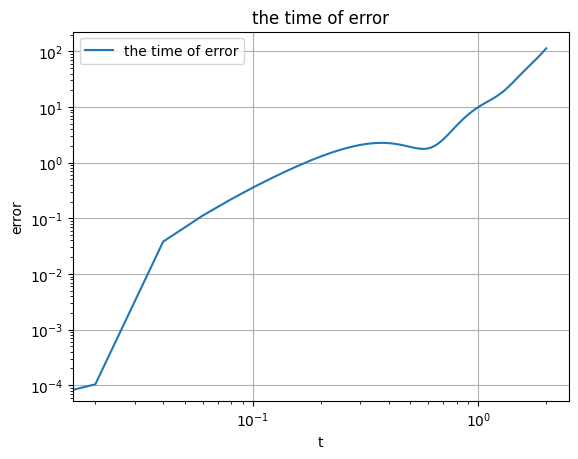

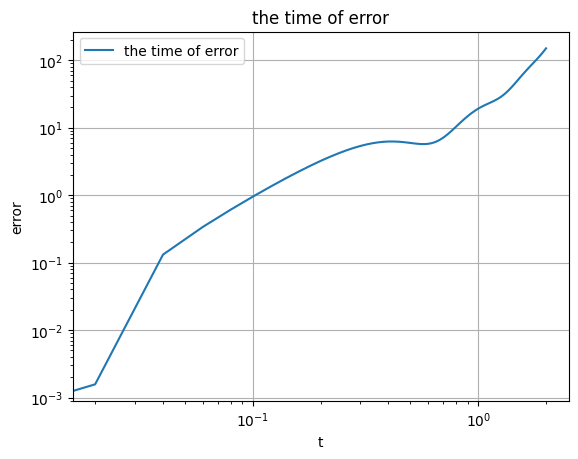

In [8]:
import numpy as np
from scipy.optimize import fsolve

def am2(ivp, n):
    
    # 时间离散化
    a, b = ivp['tspan']
    h = (b - a) / n
    t = np.array([a + i * h for i in range(n + 1)])
    
    # 正确初始化u数组，支持标量和向量
    u0 = ivp['u0']
    if isinstance(u0, (int, float)):
        u = np.zeros(n + 1)
        u[0] = u0
    else:
        # 处理向量情况
        u0 = np.asarray(u0)
        u = np.zeros((n + 1, u0.size))
        u[0] = u0
    
    # 时间循环
    for i in range(n):
        # 已知项（不依赖于新值）
        known = u[i] + h/2 * ivp['f'](u[i],  t[i])
        
        # 定义根查找函数 g(z) = z - h/2*f(z,p,t_{i+1}) - known = 0
        def g(z):
            return z - h/2 * ivp['f'](z,  t[i+1]) - known
        
        # 使用fsolve求解非线性方程（替代Levenberg方法）
        unew = fsolve(g, u[i])  # 从u[i]开始迭代
        
        # 存储结果
        u[i+1] = unew[0]
    
    return t, u

t1,u1 = am2(ivp1,100)
t2,u2 = am2(ivp2,100)
t3,u3 = am2(ivp3,100)
t4,u4 = am2(ivp4,100)
t5,u5 = am2(ivp5,100)

error_1 = error(exact_1(t1),u1)
error_2 = error(exact_2(t2),u2)
error_3 = error(exact_3(t3),u3)
error_4 = error(exact_4(t4),u4[:,0])
error_5 = error(exact_5(t5),u5[:,0])

plot_solution(t1,u1,'ivp1')
plot_solution(t2,u2,'ivp2')
plot_solution(t3,u3,'ivp3')
plot_solution(t4,u4[:,0],'ivp4')
plot_solution(t5,u5[:,0],'ivp5')

plot_error(t1,error_1)
plot_error(t1,error_2)
plot_error(t1,error_3)
plot_error(t1,error_4)
plot_error(t1,error_5)

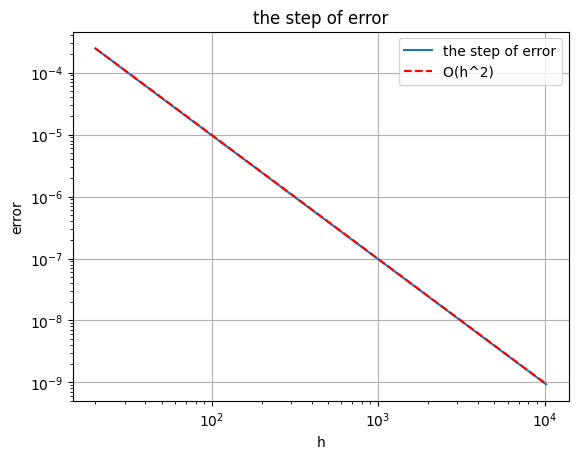

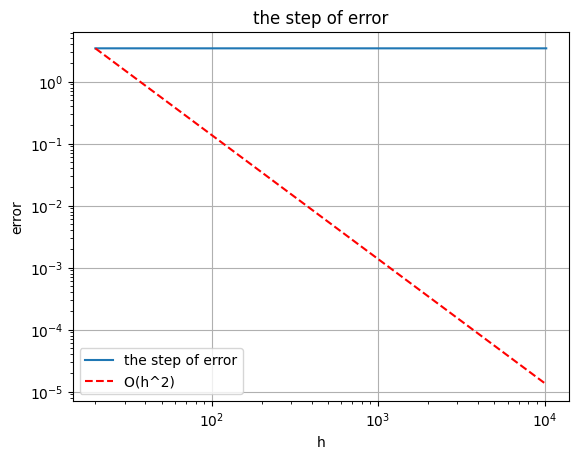

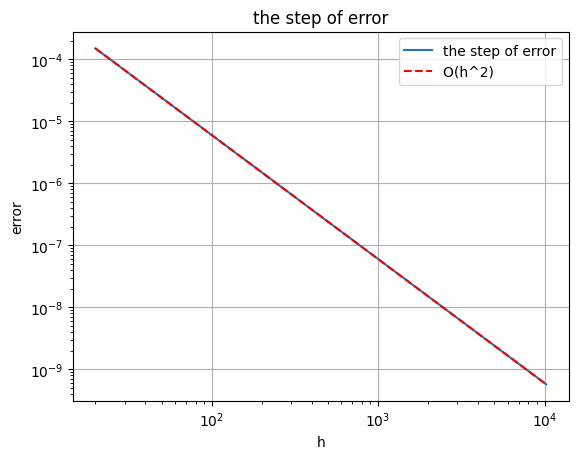

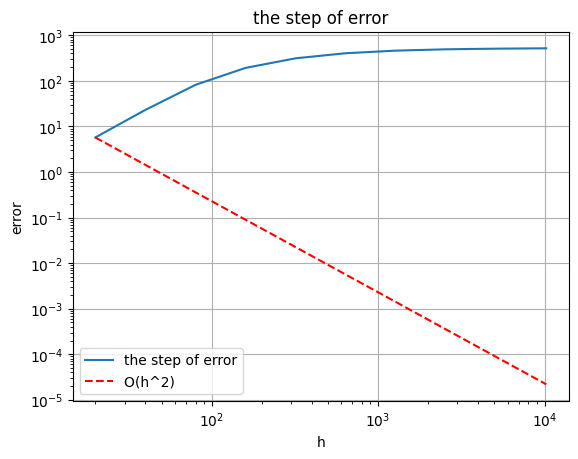

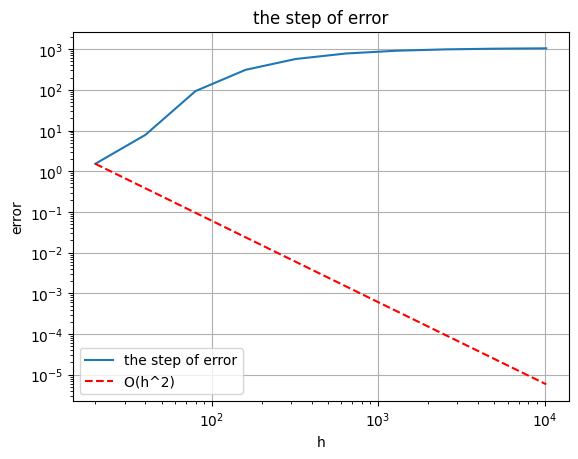

: 

In [ ]:
n = [10*2**i for i in range(1,11)]

#时间误差
def plot_time_error(t,error):
    plt.loglog(t,error,label = 'the step of error')
    ref_errors = [error[0] * (n[0]/i)**2 for i in n]
    plt.loglog(n, ref_errors, 'r--', label=f'O(h^{2}) ')
    plt.xlabel('h')
    plt.ylabel('error')
    plt.title('the step of error')
    plt.grid(True)
    plt.legend()
    plt.show()

errors_1 = []
errors_2 = []
errors_3 = []
errors_4 = []
errors_5 = []

t1 = []
t2 = []
t3 = []
t4 = []
t5 = []
#1
for i in n:
    t,u = am2(ivp1,i)
    err= error(exact_1(t)[-1] , u[-1])
    errors_1.append(err)
plot_time_error(n,errors_1)

for i in n:
    t,u = am2 (ivp2,i)
    err= error(exact_2(t)[-1] , u[-1])
    errors_2.append(err)
plot_time_error(n,errors_2)

for i in n:
    t,u = am2(ivp3,i)
    err= error(exact_3(t)[-1] , u[-1])
    errors_3.append(err)
plot_time_error(n,errors_3)

for i in n:
    t,u = am2(ivp4,i)
    err= error(exact_4(t)[-1] , u[-1,0])
    errors_4.append(err)
plot_time_error(n,errors_4)

for i in n:
    t,u = am2(ivp5,i)
    err= error(exact_5(t)[-1] , u[-1,0])
    errors_5.append(err)
plot_time_error(n,errors_5)